In [2]:
import matplotlib.pyplot as plt
from Adversary import Adversary, Problem, hamming_dist, visualize
import itertools
import numpy as np

In [3]:
def exact_k(n, k):
    no_instances = [tuple([0] * n)]
    yes_instances = list(set(itertools.permutations(tuple([0] * (n-k) + [1] * k))))
    return Problem(no_instances, yes_instances)

def threshold_k(n, k):
    no_instances = set()
    yes_instances = set()

    for i in range(k):
        no_instances = no_instances.union(itertools.permutations(tuple([0] * (n-i) + [1] * i)))

    no_instances = list(no_instances)
    yes_instances = set(itertools.permutations(tuple([0]* (n-k) + [1]*k)))
    return Problem(no_instances, list(yes_instances))

thresh = threshold_k(4, 2)

In [4]:
print(thresh)

No:[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0)]
Yes:[(0, 0, 1, 1), (0, 1, 0, 1), (0, 1, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 1, 0, 0)]


In [25]:
thresh_adversary = Adversary(thresh, lambda yes, no: 1 if no == tuple([0] * 4) else 0)

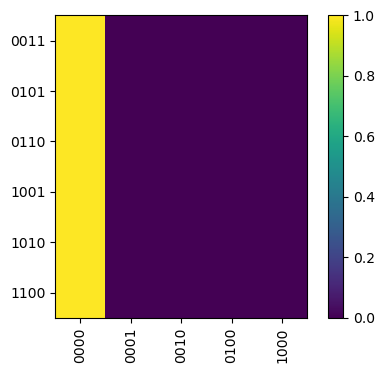

In [27]:
thresh_adversary.visualize_matrix()

In [28]:
full = np.block([[np.zeros((thresh_adversary.matrix.shape[0], thresh_adversary.matrix.shape[0])), thresh_adversary.matrix],
                [thresh_adversary.matrix.T, np.zeros((thresh_adversary.matrix.shape[1], thresh_adversary.matrix.shape[1]))]])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


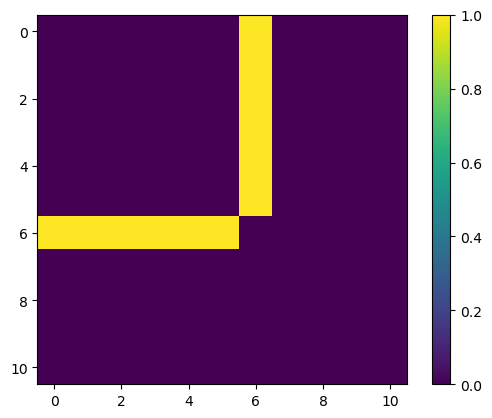

In [29]:
print(full)
visualize(full)

In [36]:
evals, evects = np.linalg.eig(full)
print(evals)
print(np.asmatrix(evects))
print(evects[:, 0])

[-2.44948974e+00  3.46756368e-16  2.44948974e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[[ 2.88675135e-01 -9.12870929e-01 -2.88675135e-01  1.55919516e-17
   1.55919516e-17  1.55919516e-17 -1.55919516e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.88675135e-01  1.82574186e-01 -2.88675135e-01 -1.38196601e-01
  -1.38196601e-01 -1.38196601e-01 -8.61803399e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.88675135e-01  1.82574186e-01 -2.88675135e-01 -4.47213595e-01
  -4.47213595e-01 -4.47213595e-01  4.47213595e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.88675135e-01  1.82574186e-01 -2.88675135e-01  8.61803399e-01
  -1.38196601e-01 -1.38196601e-01  1.38196601e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.88675135e-01  1.82574186e-01 -2.88675135e-01 -1.38196601e-01
   8.61803399e-01 -1.3

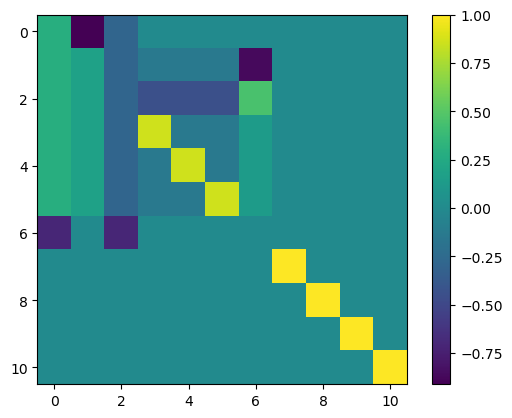

In [31]:
plt.imshow(evects)
plt.colorbar()

In [45]:
np.linalg.norm(full, 2)

2.449489742783178

In [33]:
for i in range(4):
    print(thresh_adversary.partial_norm(i))

1.7320508075688772
1.7320508075688772
1.7320508075688772
1.7320508075688772


In [42]:
adv_mat = thresh_adversary.matrix
np.linalg.norm(adv_mat@adv_mat.T, 2)

6.000000000000002

In [35]:
np.sqrt(2)

1.4142135623730951

In [46]:
2.449489742783178**2

5.999999999999999

In [52]:
thresh_adversary.partial_norm(2)**2

2.9999999999999996